In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import re
import time
from datetime import datetime, timedelta
from pandas.tseries.offsets import *
import locale
locale.setlocale(locale.LC_TIME, "de_DE.UTF-8")

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'patch.linewidth': 0.5,
    'patch.facecolor': '#C5C6C8',
    'patch.edgecolor': '#C5C6C8',
    'patch.antialiased': True,
    'font.size': 10.0,
    #'font.family': 'Futura',
    'axes.facecolor': '#C5C6C8',
    'axes.edgecolor': '#C5C6C8',
    'axes.linewidth': '1',
    'axes.grid': False,
    'axes.titlesize': 'x-large',
    'axes.labelsize': 'large',
    'axes.labelcolor': 'black',
    'axes.axisbelow': True,
    'axes.prop_cycle': cycler('color', ['#002458', '#01388B', '#0474BC', '#009DE0', '#004318', '#016B29', '#6AAF21', '#BCCD02', '#013646', '#015764', '#017783', '#0198A1', '#570B56', '#7A0B69', '#E30059', '#700D10', '#940D13', '#EF7F01', '#FDCC03']),
    'xtick.color': 'black',
    'xtick.direction': 'out',
    'ytick.color': 'black',
    'ytick.direction': 'out',
    'grid.color': '#C5C6C8',
    'grid.linestyle': '-',
    'figure.facecolor': '#C5C6C8',
    'savefig.bbox' : 'tight'
})

In [3]:
df = pd.read_csv('speedtest_sorted.csv')

In [4]:
df.dtypes

date                     object
download                float64
test_server              object
test_server_distance    float64
test_server_latency     float64
test_server_location     object
upload                  float64
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

date                    datetime64[ns]
download                       float64
test_server                     object
test_server_distance           float64
test_server_latency            float64
test_server_location            object
upload                         float64
dtype: object

In [7]:
df.head()

,date,download,test_server,test_server_distance,test_server_latency,test_server_location,upload
0,2016-12-04 06:24:55,54.13,wilhelm.tel,14.59,31.589,Norderstedt,5.33
1,2016-12-04 21:30:01,49.51,C&S Breitband GmbH,37.30,31.824,Bad Oldesloe,5.33
2,2016-12-04 21:40:02,51.08,C&S Breitband GmbH,37.30,30.336,Bad Oldesloe,5.44
3,2016-12-04 21:50:02,49.49,wilhelm.tel,14.59,31.136,Norderstedt,5.32
4,2016-12-04 22:00:01,49.71,C&S Breitband GmbH,37.30,30.492,Bad Oldesloe,5.49


In [8]:
df[df.date < '1970']

,date,download,test_server,test_server_distance,test_server_latency,test_server_location,upload


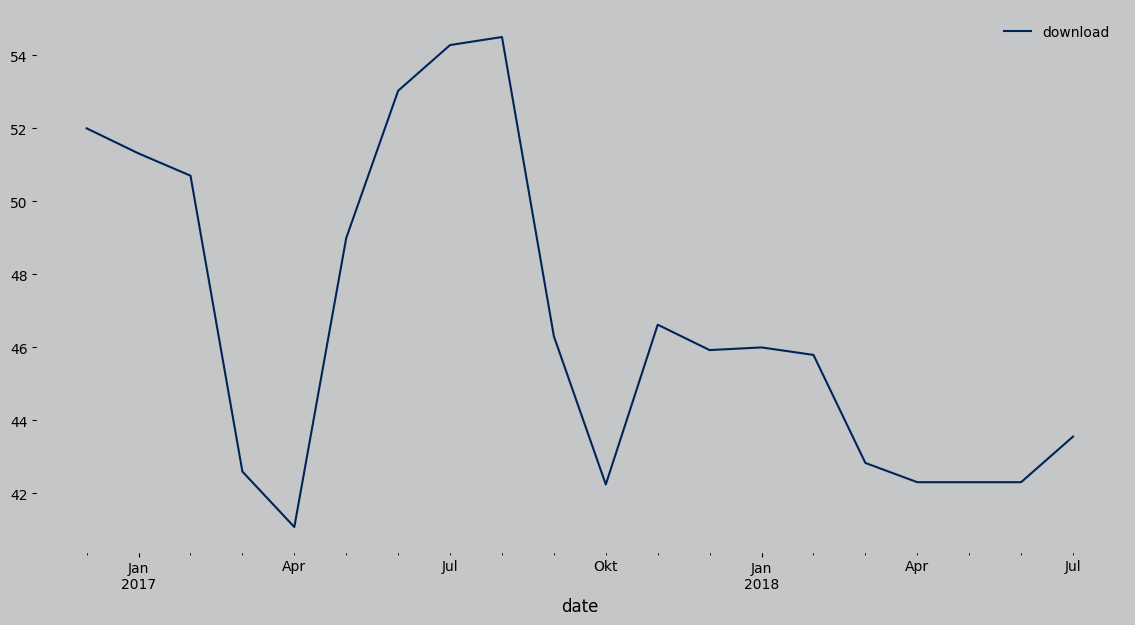

In [154]:
ax = df.resample('M', on='date').download.mean().fillna(method='ffill', limit=2)
ax = ax.reset_index().plot(x='date', y='download')
plt.show()

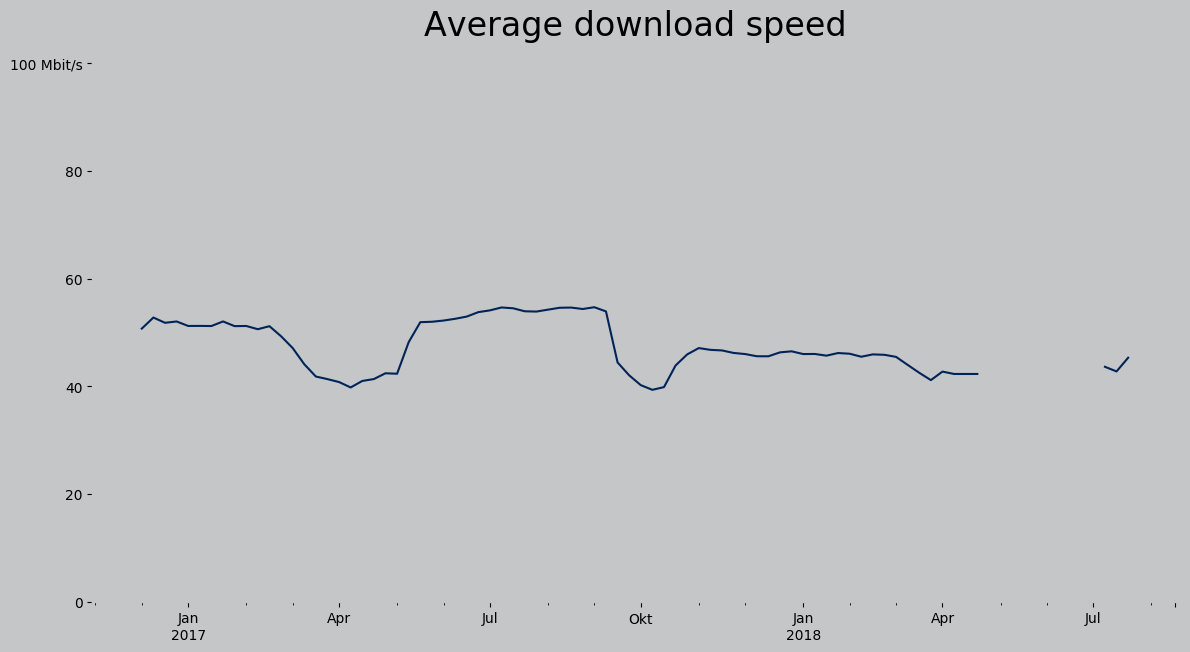

In [155]:
ax = df.resample('W', on='date').download.mean().fillna(method='ffill', limit=2)
ax = ax.reset_index().plot(x='date', y='download', figsize=(14,7))
ax.set_ylim([0, 100])
ax.set_title ("Average download speed", pad=20,fontsize=24)
ax.set_yticklabels([0,20,40,60,80,'100 Mbit/s'])
ax.legend_.remove()
ax.xaxis.label.set_visible(False)
plt.savefig("1.pdf", facecolor = ax.get_facecolor())
plt.show()

In [11]:
df.head(100).resample('D', on='date').mean().download

date
2016-12-04    50.736250
2016-12-05    52.947857
2016-12-06    51.497083
2016-12-07    53.237083
2016-12-08    54.175000
Freq: D, Name: download, dtype: float64

In [12]:
temp = pd.DatetimeIndex(df.date)
df['weekday'] = temp.weekday

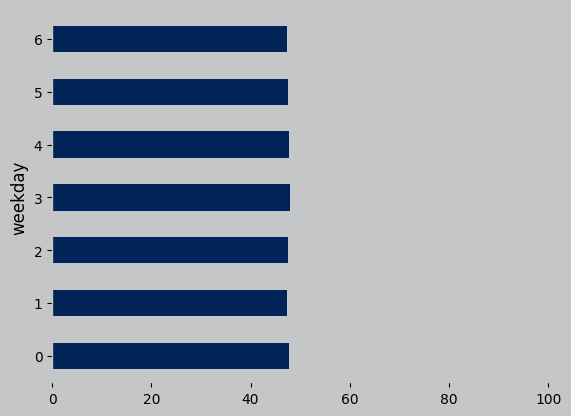

In [13]:
ax = df.groupby('weekday').download.mean().plot(kind='barh', color = '#002458' )
ax.set_xlim([0, 100])
plt.show()

In [14]:
#!python3 -m pip install pywaffle

In [15]:
from pywaffle import Waffle

/home/jls/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


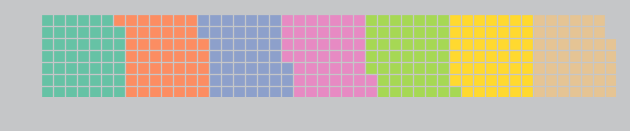

In [16]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=7,
    values=df.groupby('weekday').download.mean())
plt.show()

/home/jls/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


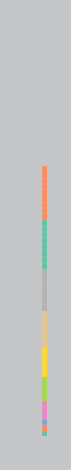

In [17]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=70,
    values=range(0, 10, 1))
plt.show()

/home/jls/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


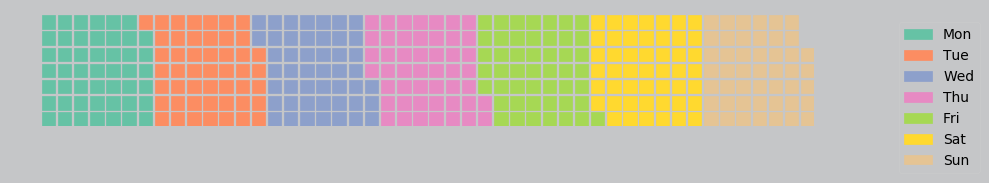

In [18]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=7,
    values=df.groupby('weekday').download.mean(),
    labels=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    figsize=(10, 5),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.show()

In [19]:
def speed2color(speed):
    if speed > 47.9:
        return '#009DE0'
    elif speed > 47.7:
        return '#01388B'
    elif speed > 47.5:
        return '#0474BC'
    else:
        return '#002458'
    return

daily_colors = [speed2color(s) for s in df.groupby('weekday').download.mean().tolist()]

daily_colors

['#01388B', '#002458', '#0474BC', '#009DE0', '#01388B', '#0474BC', '#002458']

In [20]:
df.groupby('weekday').download.mean().tolist()

[47.767101234567924,
 47.333644110275465,
 47.551608910891126,
 47.987148655504804,
 47.764245472837025,
 47.605079365079476,
 47.39953172205445]

/home/jls/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


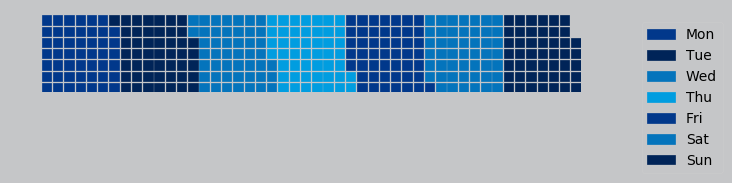

In [21]:
fig = plt.figure(
    FigureClass=Waffle,
    rows = 7,
    values=df.groupby('weekday').download.mean().tolist(),
    labels=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    figsize=(7, 1),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    colors = daily_colors
)
plt.show()

/home/jls/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


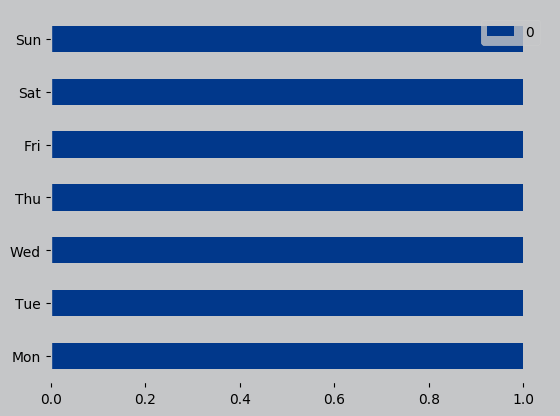

In [22]:
days = pd.DataFrame(pd.Series({'Mon':1,'Tue':1, 'Wed':1, 'Thu':1, 'Fri':1, 'Sat':1, 'Sun':1}))
days.plot(kind='barh', colors=daily_colors)
plt.show()

/home/jls/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


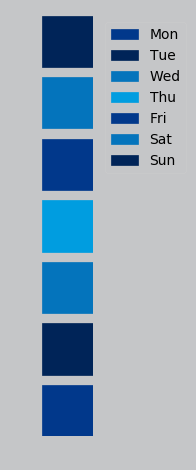

In [157]:
fig = plt.figure(
    FigureClass=Waffle,
    rows = 7,
    values={'Mon':1,'Tue':1, 'Wed':1, 'Thu':1, 'Fri':1, 'Sat':1, 'Sun':1},
    #labels=['Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],
    #figsize=(7, 1),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    colors = daily_colors
)
plt.savefig("2.pdf", facecolor = ax.get_facecolor())
plt.show()

In [24]:
#!python3 -m pip install calmap

In [25]:
import calmap

In [26]:
df.head()

,date,download,test_server,test_server_distance,test_server_latency,test_server_location,upload,weekday
0,2016-12-04 06:24:55,54.13,wilhelm.tel,14.59,31.589,Norderstedt,5.33,6
1,2016-12-04 21:30:01,49.51,C&S Breitband GmbH,37.30,31.824,Bad Oldesloe,5.33,6
2,2016-12-04 21:40:02,51.08,C&S Breitband GmbH,37.30,30.336,Bad Oldesloe,5.44,6
3,2016-12-04 21:50:02,49.49,wilhelm.tel,14.59,31.136,Norderstedt,5.32,6
4,2016-12-04 22:00:01,49.71,C&S Breitband GmbH,37.30,30.492,Bad Oldesloe,5.49,6


In [27]:
df_time = df.iloc[:,0:2]
df_time = df_time.set_index(['date'])
df_time.head()

,download
date,
2016-12-04 06:24:55,54.13
2016-12-04 21:30:01,49.51
2016-12-04 21:40:02,51.08
2016-12-04 21:50:02,49.49
2016-12-04 22:00:01,49.71


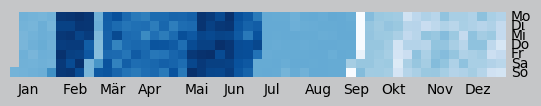

In [159]:
ax = calmap.yearplot(df_time.download,  year=2017, how='sum', cmap='Blues', linewidth=0)
ax.figsize=(14,7)
plt.savefig("3-2.pdf", facecolor = ax.get_facecolor())
plt.show()

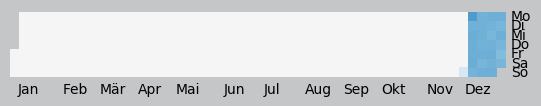

In [160]:
ax = calmap.yearplot(df_time.download,  year=2016, how='sum', cmap='Blues', linewidth=0)
plt.savefig("3-1.pdf", facecolor = ax.get_facecolor())
plt.show()

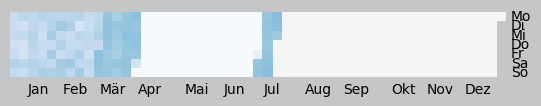

In [161]:
ax = calmap.yearplot(df_time.download, year=2018, how='sum', cmap='Blues', linewidth=0)
plt.savefig("3-3.pdf", facecolor = ax.get_facecolor())
plt.show()

TypeError: 'AxesSubplot' object is not iterable

In [29]:
df_time.index.dtype

dtype('<M8[ns]')

In [30]:
df_time.index = pd.to_datetime(df_time.index)

In [31]:
df_time

,download
date,
2016-12-04 06:24:55,54.13
2016-12-04 21:30:01,49.51
2016-12-04 21:40:02,51.08
2016-12-04 21:50:02,49.49
2016-12-04 22:00:01,49.71
2016-12-04 22:10:01,49.78
2016-12-04 22:20:02,51.01
2016-12-04 22:30:01,51.18
2016-12-05 09:10:02,55.60


In [51]:
df.head()

,date,download,test_server,test_server_distance,test_server_latency,test_server_location,upload,weekday
0,2016-12-04 06:24:55,54.13,wilhelm.tel,14.59,31.589,Norderstedt,5.33,6
1,2016-12-04 21:30:01,49.51,C&S Breitband GmbH,37.30,31.824,Bad Oldesloe,5.33,6
2,2016-12-04 21:40:02,51.08,C&S Breitband GmbH,37.30,30.336,Bad Oldesloe,5.44,6
3,2016-12-04 21:50:02,49.49,wilhelm.tel,14.59,31.136,Norderstedt,5.32,6
4,2016-12-04 22:00:01,49.71,C&S Breitband GmbH,37.30,30.492,Bad Oldesloe,5.49,6


In [59]:
#temp = pd.DatetimeIndex(df.date)
df['hour_of_day'] = temp.hour

In [66]:
df[df.hour_of_day < 12].groupby('hour_of_day').download.mean()

hour_of_day
0     47.305613
1     48.033620
2     48.186345
3     48.436543
4     47.685943
5     47.872546
6     47.526993
7     47.646707
8     47.786229
9     47.282431
10    47.074724
11    48.944655
Name: download, dtype: float64

In [127]:
df.groupby('hour_of_day').download.mean().describe()

count    24.000000
mean     47.631719
std       0.564575
min      46.429520
25%      47.264576
50%      47.666325
75%      47.969994
max      48.944655
Name: download, dtype: float64

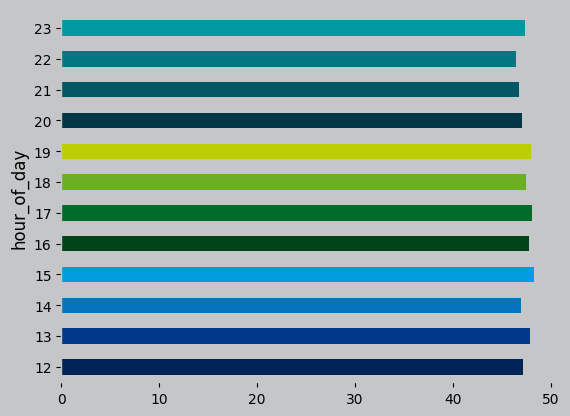

In [69]:
df[df.hour_of_day > 11].groupby('hour_of_day').download.mean().plot(kind='barh')
plt.show()

In [101]:
df_temp = df
df_temp['clock'] = 1
df_temp[df_temp.hour_of_day>11].groupby('hour_of_day').clock.mean()

hour_of_day
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
Name: clock, dtype: int64

In [128]:
df[df.hour_of_day < 12].groupby('hour_of_day').download.mean()

hour_of_day
0     47.305613
1     48.033620
2     48.186345
3     48.436543
4     47.685943
5     47.872546
6     47.526993
7     47.646707
8     47.786229
9     47.282431
10    47.074724
11    48.944655
Name: download, dtype: float64

In [129]:
def get_colors(x):
    if x > 48.2:
        c = '#002458'
    elif x > 47.9:
        c = '#01388B'
    elif x >47.2:
        c = '#0474BC'
    else:
        c = '#009DE0'
    return c


['#0474BC',
 '#01388B',
 '#01388B',
 '#002458',
 '#0474BC',
 '#0474BC',
 '#0474BC',
 '#0474BC',
 '#0474BC',
 '#0474BC',
 '#009DE0',
 '#002458']

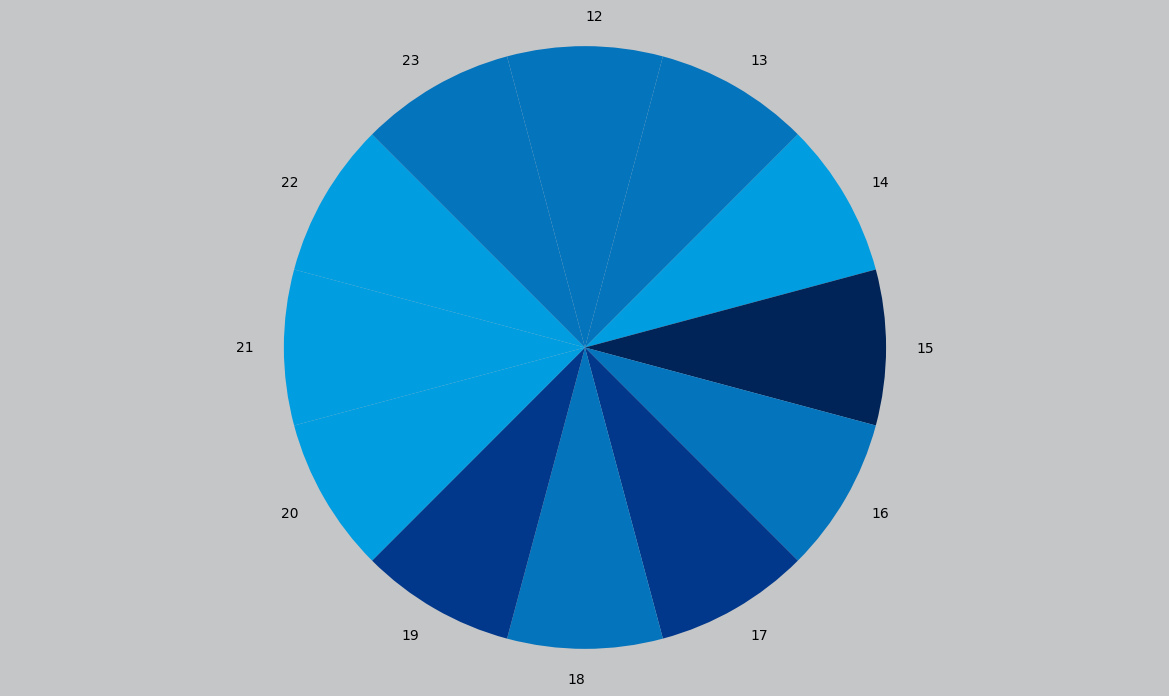

In [167]:
pie_colors=[get_colors(s) for s in df[df.hour_of_day>11].groupby('hour_of_day').download.mean()]

ax = df_temp[df_temp.hour_of_day>11].groupby('hour_of_day').clock.mean().plot(kind='pie',counterclock=False, startangle = -255, figsize=(12,7), colors = pie_colors)
plt.axis('equal')
plt.tight_layout()
#ax.set_title ("PM", pad=20,fontsize=24)
ax.yaxis.label.set_visible(False)
plt.savefig("4-2.pdf", facecolor = ax.get_facecolor())
plt.show()

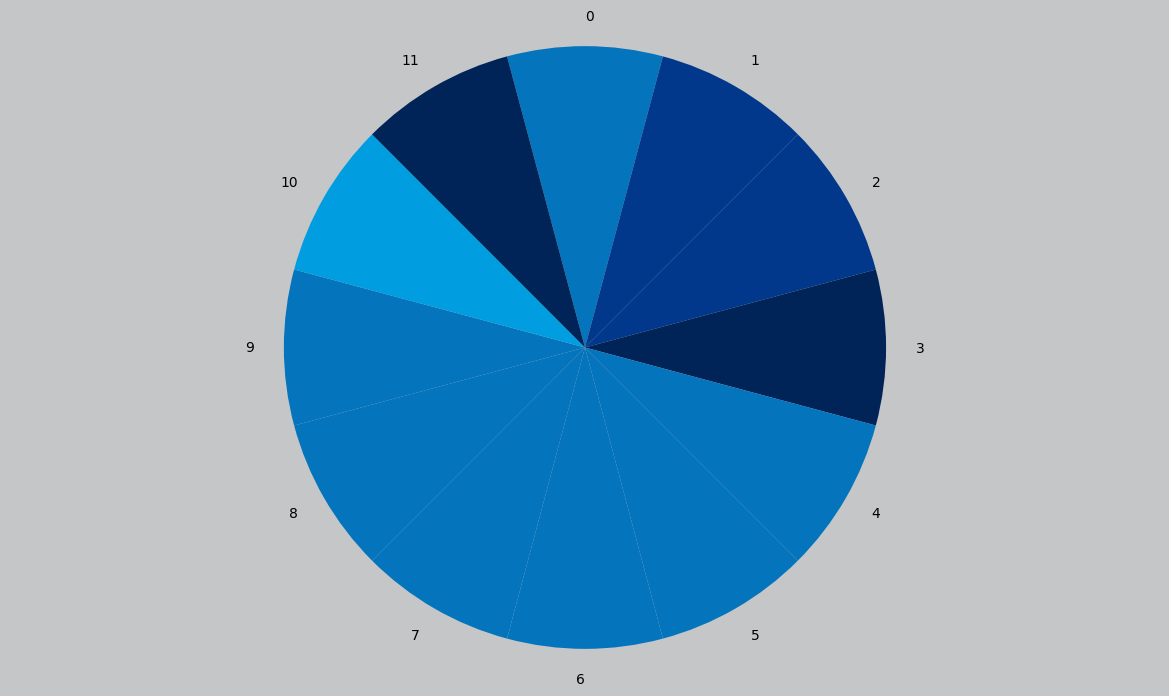

In [166]:
pie_colors=[get_colors(s) for s in df[df.hour_of_day<=11].groupby('hour_of_day').download.mean()]

ax = df_temp[df_temp.hour_of_day<=11].groupby('hour_of_day').clock.mean().plot(kind='pie',counterclock=False, startangle = -255, figsize=(12,7), colors = pie_colors)
plt.axis('equal')
plt.tight_layout()
#ax.set_title ("The AM", pad=20,fontsize=24)
ax.yaxis.label.set_visible(False)
plt.savefig("4-1.pdf", facecolor = ax.get_facecolor())
plt.show()

In [78]:
clock = [n for n in range(0,12,1)]
clock

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]